<a href="https://colab.research.google.com/github/Bharathidasan-datascientist/bharathi/blob/master/Image_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

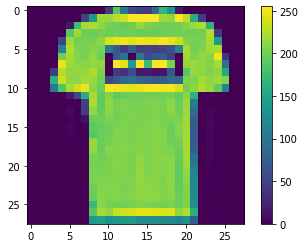

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images=train_images/225.0
test_images=test_images/225.0

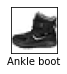

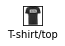

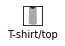

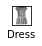

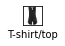

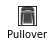

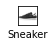

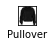

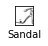

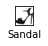

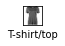

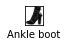

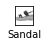

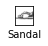

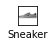

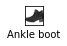

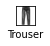

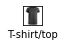

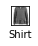

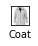

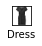

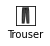

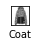

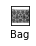

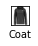

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(10,10,10+i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [15]:
model=keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128,activation='relu'),
      keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [18]:
model.fit(train_images,train_labels,epochs=10)
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6329 - accuracy: 0.7783
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3828 - accuracy: 0.8604
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3399 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3191 - accuracy: 0.8814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3004 - accuracy: 0.8885
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2758 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2526 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2439 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

In [19]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions=probability_model.predict(test_images)
predictions[0]

array([1.9684838e-07, 1.3533133e-08, 6.4372035e-11, 2.4115592e-14,
       8.8553512e-11, 8.1899366e-04, 1.8629873e-09, 4.5212931e-03,
       3.9290644e-08, 9.9465948e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [23]:
np.argmin(predictions[0])

3

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

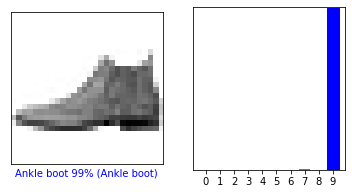

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

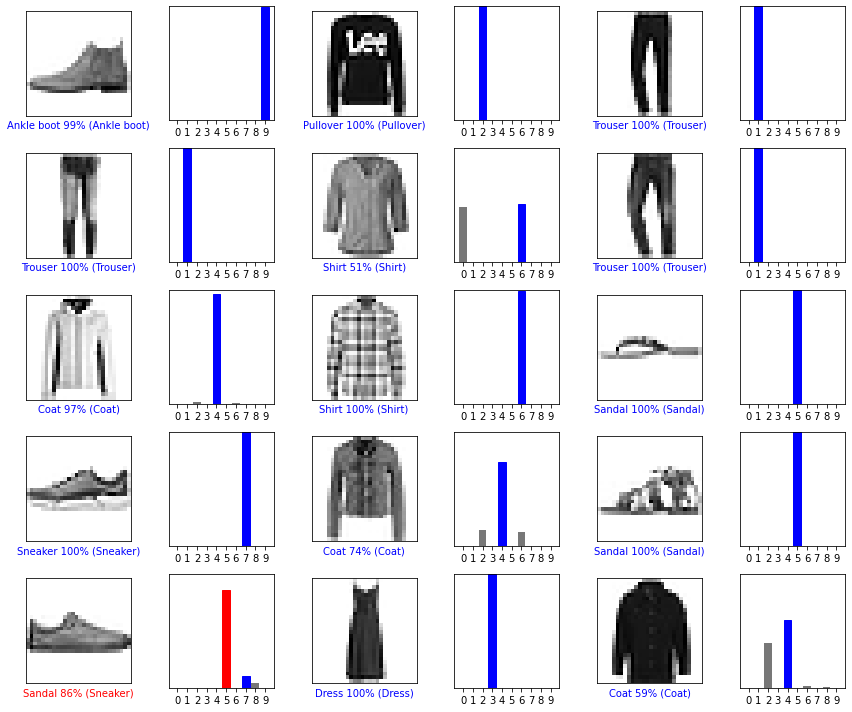

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()